# Data Visualization

### import libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator
from model import Model
from layer import Linear, ActivationFunc

### create data frame

In [6]:
url='6class.csv'
df=pd.read_csv(url)

In [7]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [20]:
temp='Temperature (K)'
L='Luminosity(L/Lo)'
r='Radius(R/Ro)'
abs_mag='Absolute magnitude(Mv)'
st='Star type'
sc='Star color'
spec='Spectral Class'

### H-R Diagram

In [17]:
star_nn = Model()

star_nn.addLayer(Linear(input_size = 4, output_size = 32))
star_nn.addLayer(ActivationFunc("relu"))

star_nn.addLayer(Linear(input_size = 32, output_size = 16))
star_nn.addLayer(ActivationFunc("relu"))

star_nn.addLayer(Linear(input_size = 16, output_size = 6))

star_nn.compile(learning_rate = 1e-2) 


In [22]:
label_map = {
        0 : 'Brown Dwarf',
        1 : 'Red Dwarf',
        2 : 'White Dwarf',
        3 : 'Main Sequence',
        4 : 'Supergiant',
        5 : 'Hypergiant'
    }
arr = [label_map[x] for x in df[st]]

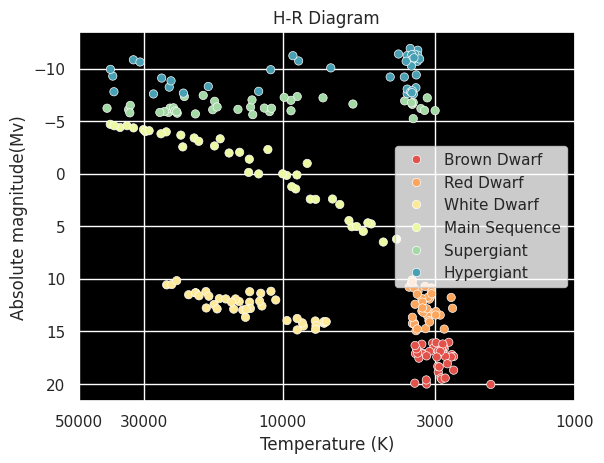

In [23]:
sns.scatterplot(data=df,x=temp,y=abs_mag,hue=arr,palette='Spectral')
sns.set(rc={'axes.facecolor':'black'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xscale('log')
plt.title('H-R Diagram')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
plt.xticks([50000,30000, 10000,3000, 1000], ['50000','30000', '10000','3000', '1000'])
plt.show()

<br>

### I. correlation map

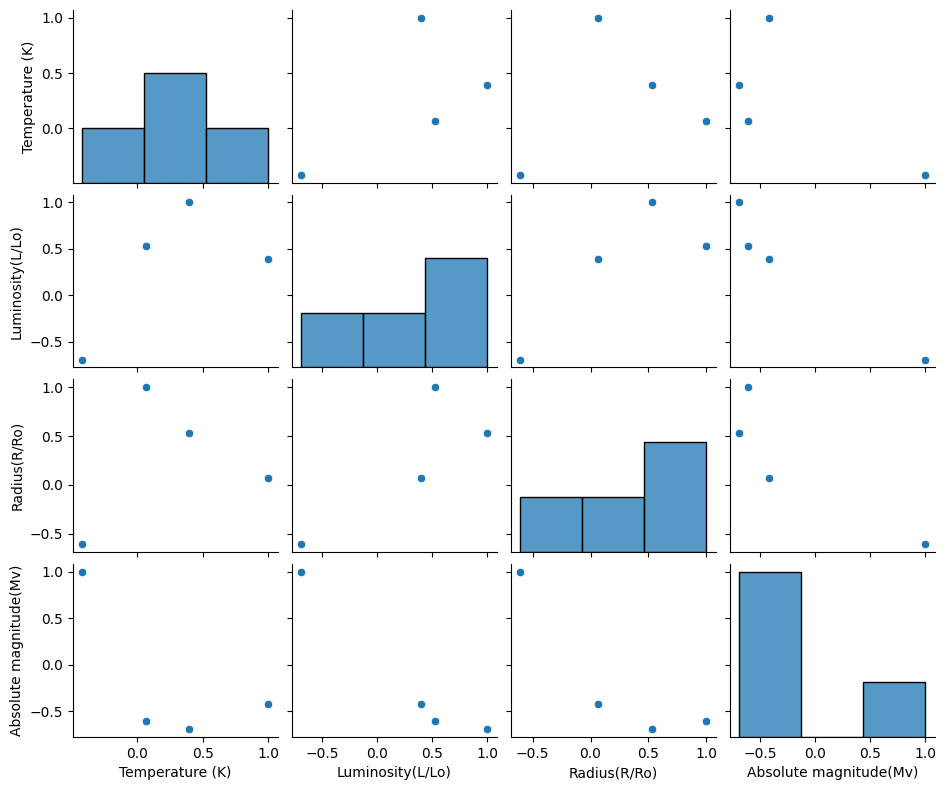

In [33]:
sns.pairplot(df.iloc[:,:-3].corr(),height=2, aspect=1.2)#without star type, star color, and spectral class
plt.show()

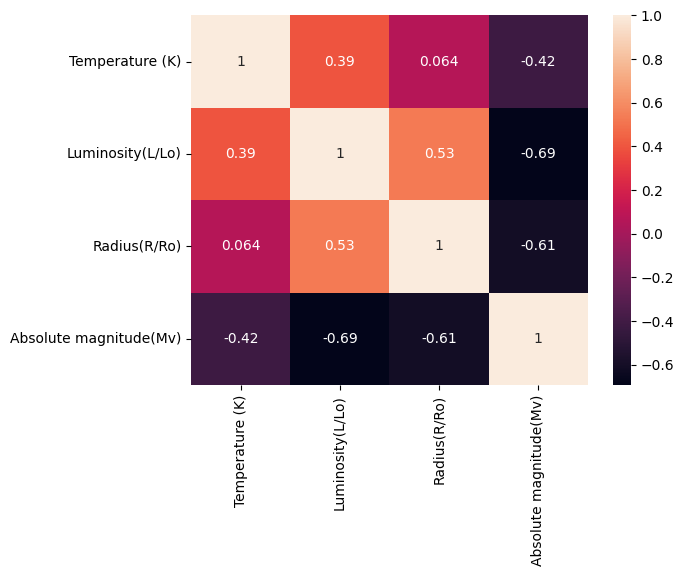

In [34]:
sns.heatmap(df.iloc[:,:-3].corr(),annot=True)
plt.show()

### II. scatter/box plots

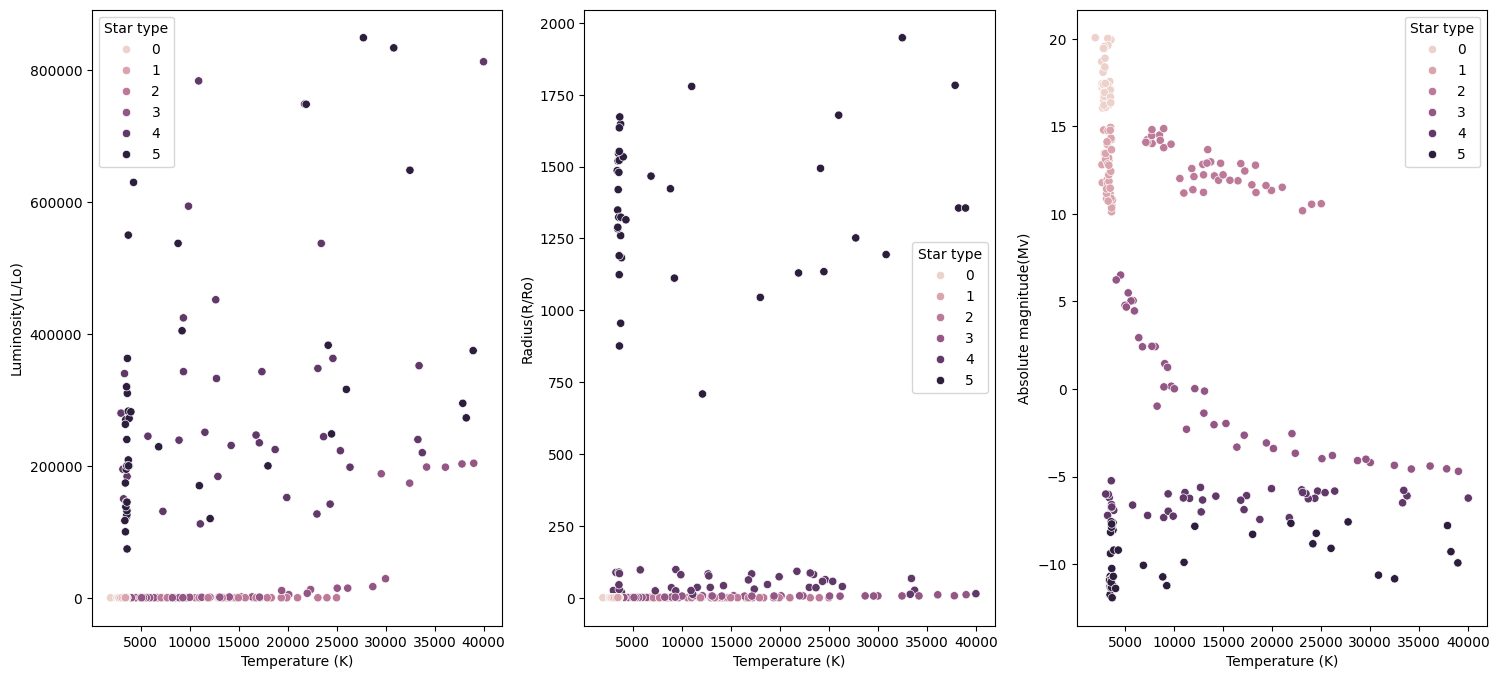

In [74]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x=temp,y=L,hue=st)
plt.subplot(1,3,2)
sns.scatterplot(data=df,x=temp,y=r,hue=st)
plt.subplot(1,3,3)
sns.scatterplot(data=df,x=temp,y=abs_mag,hue=st)
plt.show()

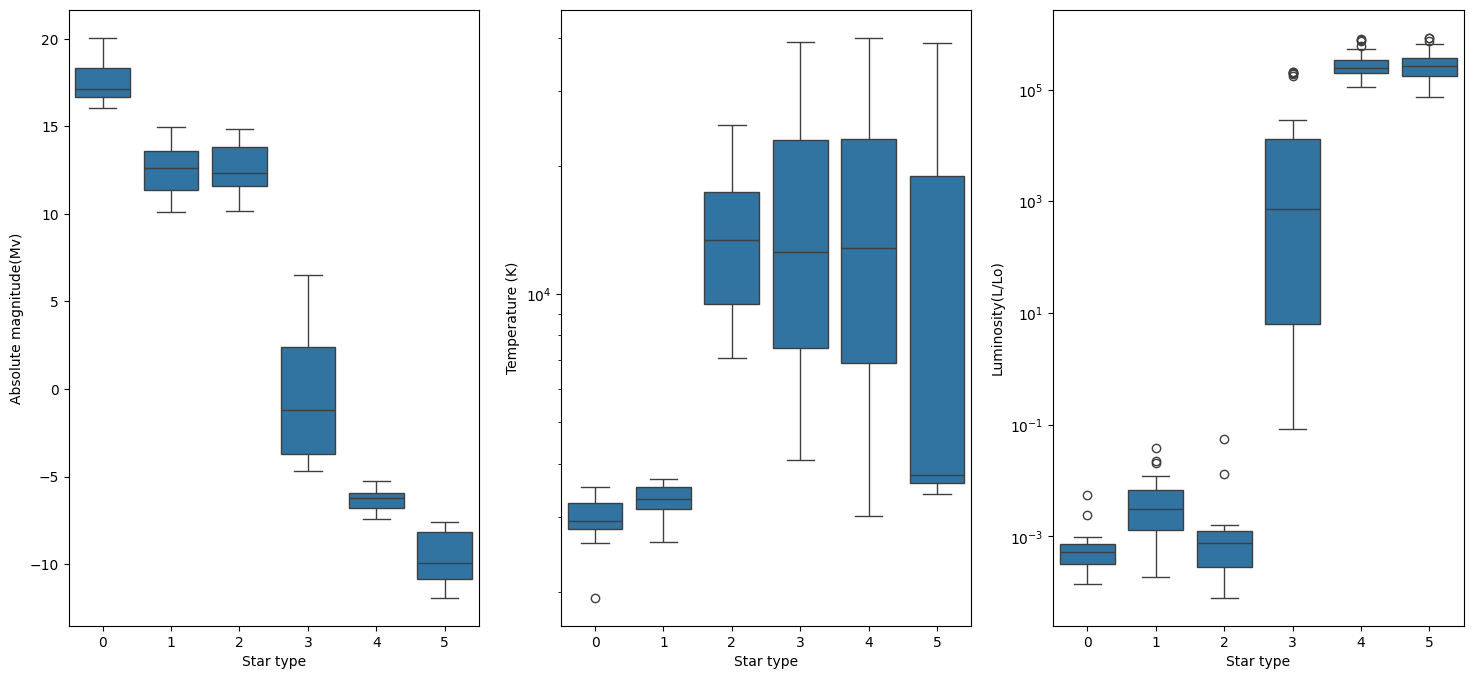

In [120]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(data=df, x=st, y=abs_mag)
plt.subplot(1,3,2)
sns.boxplot(data=df, x=st, y=temp)
plt.yscale('log')
plt.subplot(1,3,3)
sns.boxplot(data=df, x=st, y=L)
plt.yscale('log')

plt.show()

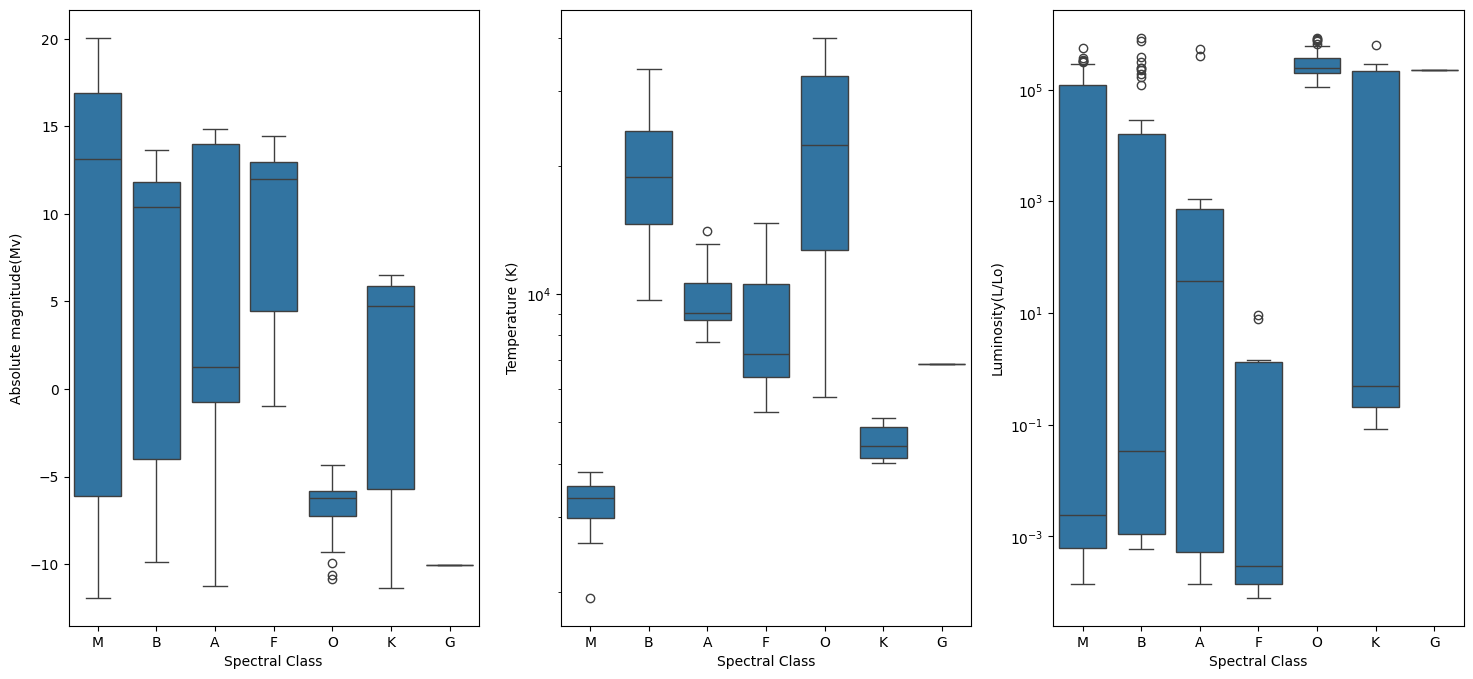

In [119]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(data=df, x=spec, y=abs_mag)
plt.subplot(1,3,2)
sns.boxplot(data=df, x=spec, y=temp) ## particularly useful, others don't show much
plt.yscale('log')
plt.subplot(1,3,3)
sns.boxplot(data=df, x=spec, y=L)
plt.yscale('log')